In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns

In [17]:
palette1 = sns.color_palette("pastel")
palette = sns.color_palette("deep")

c_scatter = palette[0]
c_line = palette1[1]
c_ci = palette1[1]

In [5]:
with open("scores_results.json", "r") as f:
    scores = json.load(f)

with open("regression_results.json", "r") as f:
    regs = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'scores_results.json'

In [ ]:
# Choose which regression to plot
reg_key = "ue1"   # or "p_true2ue", or one of the ensemble funcs
slope = regs[reg_key]["slope"]
intercept = regs[reg_key]["intercept"]


all_x = []
all_y = []

for qid, d in scores.items():
    # pick the matching variable for the regression chosen
    if reg_key == "ue1":
        x_vals = d["sum_of_eigen"]
    elif reg_key == "p_true2ue":
        x_vals = d["ue2"]
    else:
        raise ValueError("unsupported regression key")

    y_vals = d["safe_scores"]

    # extend all
    all_x.extend(x_vals)
    all_y.extend(y_vals)

x = np.array(all_x)
y = np.array(all_y)

x_line = np.linspace(x.min(), x.max(), 200)
y_line = intercept + slope * x_line

n = len(x)
y_pred = intercept + slope * x
residuals = y - y_pred
s_err = np.sqrt(np.sum(residuals**2) / (n - 2))

t_val = t.ppf(0.975, df=n - 2)
ci = t_val * s_err * np.sqrt(
    1/n + (x_line - np.mean(x))**2 / np.sum((x - np.mean(x))**2)
)

upper = y_line + ci
lower = y_line - ci

In [ ]:
palette = sns.color_palette("pastel")
c_scatter = palette[0]
c_line = palette[1]
c_ci = palette[1]

plt.scatter(x, y, color=c_scatter)
plt.plot(x_line, y_line, color=c_line)
plt.fill_between(x_line, lower, upper, color=c_ci, alpha=0.25)

plt.xlabel("X values")
plt.ylabel("Safe scores")
plt.title(f"Regression: {reg_key}")

plt.show()

In [ ]:
reg_key = "ue2"   
slope = regs[reg_key]["slope"]
intercept = regs[reg_key]["intercept"]


all_x = []
all_y = []

for qid, d in scores.items():
    # pick the matching variable for the regression chosen
    if reg_key == "ue1":
        x_vals = d["sum_of_eigen"]
    elif reg_key == "p_true2ue":
        x_vals = d["ue2"]
    else:
        raise ValueError("unsupported regression key")

    y_vals = d["safe_scores"]

    # extend all
    all_x.extend(x_vals)
    all_y.extend(y_vals)

x = np.array(all_x)
y = np.array(all_y)

x_line = np.linspace(x.min(), x.max(), 200)
y_line = intercept + slope * x_line

n = len(x)
y_pred = intercept + slope * x
residuals = y - y_pred
s_err = np.sqrt(np.sum(residuals**2) / (n - 2))

t_val = t.ppf(0.975, df=n - 2)
ci = t_val * s_err * np.sqrt(
    1/n + (x_line - np.mean(x))**2 / np.sum((x - np.mean(x))**2)
)

upper = y_line + ci
lower = y_line - ci

In [6]:


plt.scatter(x, y, color=c_scatter)
plt.plot(x_line, y_line, color=c_line)
plt.fill_between(x_line, lower, upper, color=c_ci, alpha=0.25)

plt.xlabel("X values")
plt.ylabel("Safe scores")
plt.title(f"Regression: {reg_key}")

plt.show()

NameError: name 'x' is not defined

In [ ]:
reg_keys = ['ue1', 'ue2', 'sum', 'min', 'max', 'avg', 'havg']
for reg in reg_keys:
    slope = regs[reg]["slope"]
    intercept = regs[reg_key]["intercept"]

    all_x = []
    all_y = []

    for qid, d in scores.items():
        # pick the matching variable for the regression chosen
        if reg_key == "ue1":
            x_vals = d["sum_of_eigen"]
        elif reg_key == "p_true2ue":
            x_vals = d["ue2"]
        else:
            raise ValueError("unsupported regression key")

        y_vals = d["safe_scores"]

        # extend all
        all_x.extend(x_vals)
        all_y.extend(y_vals)

    x = np.array(all_x)
    y = np.array(all_y)

    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = intercept + slope * x_line

    n = len(x)
    y_pred = intercept + slope * x
    residuals = y - y_pred
    s_err = np.sqrt(np.sum(residuals**2) / (n - 2))

    t_val = t.ppf(0.975, df=n - 2)
    ci = t_val * s_err * np.sqrt(
        1/n + (x_line - np.mean(x))**2 / np.sum((x - np.mean(x))**2)
    )

    upper = y_line + ci
    lower = y_line - ci


    plt.scatter(x, y, color=c_scatter)
    plt.plot(x_line, y_line, color=c_line)
    plt.fill_between(x_line, lower, upper, color=c_ci, alpha=0.25)

    plt.xlabel(get_xlabel(reg))
    plt.ylabel("Safe scores")
    plt.title(f"Regression: {reg_key}")

    plt.show()

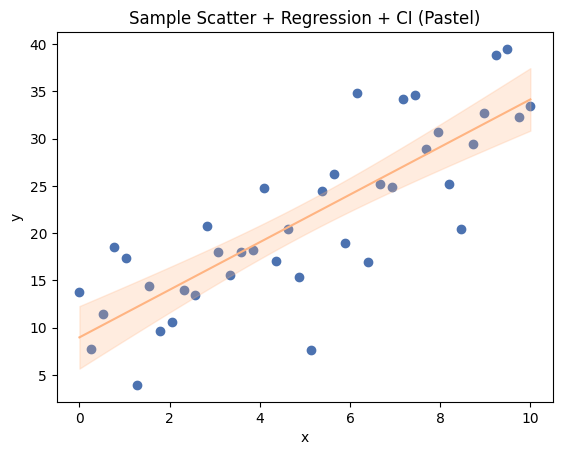

In [16]:

# EXPERIMENTS
np.random.seed(0)
x = np.linspace(0, 10, 40)
y = 3 * x + 5 + np.random.normal(0, 5, size=len(x))

# -----------------------------
# Regression
# -----------------------------
slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = intercept + slope * x_line

# -----------------------------
# Confidence Interval (95%)
# -----------------------------
n = len(x)
y_pred = intercept + slope * x
residuals = y - y_pred
s_err = np.sqrt(np.sum(residuals**2) / (n - 2))

t_val = t.ppf(0.975, df=n - 2)
ci = t_val * s_err * np.sqrt(
    1/n + (x_line - np.mean(x))**2 / np.sum((x - np.mean(x))**2)
)

upper = y_line + ci
lower = y_line - ci

# -----------------------------
# Colors (seaborn pastel)
# -----------------------------
palette1 = sns.color_palette("pastel")
palette = sns.color_palette("deep")

c_scatter = palette[0]
c_line = palette1[1]
c_ci = palette1[1]

# -----------------------------
# Plot
# -----------------------------
plt.scatter(x, y, color=c_scatter)
plt.plot(x_line, y_line, color=c_line)
plt.fill_between(x_line, lower, upper, color=c_ci, alpha=0.25)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample Scatter + Regression + CI (Pastel)")

plt.show()